# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('demo01.csv', na_values = ('na', 'NaN', ' ', ''))
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [3]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [4]:
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [5]:
df['mau'].value_counts()

mau
False    16260
True       390
Name: count, dtype: int64

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [6]:
metadata = pd.DataFrame({'Variavel': df.columns, 'Data Type': df.dtypes})
metadata


,Variavel,Data Type
sexo,sexo,object
posse_de_veiculo,posse_de_veiculo,object
posse_de_imovel,posse_de_imovel,object
qtd_filhos,qtd_filhos,int64
tipo_renda,tipo_renda,object
educacao,educacao,object
estado_civil,estado_civil,object
tipo_residencia,tipo_residencia,object
idade,idade,float64
tempo_emprego,tempo_emprego,float64


In [7]:
qtd_categorias = []
# Iterar sobre os nomes das variáveis no DataFrame
for coluna in df.columns:
    # Verificar se a variável é categórica
    if df[coluna].dtype == 'object':
        qtd_categorias.append(df[coluna].nunique())  # Contar o número de categorias e adicionar à lista
    else:
        qtd_categorias.append(np.nan)  # Se a variável não for categórica, adicionar NaN à lista

# Adicionar a lista de quantidades de categorias ao DataFrame de metadados
metadata['qtd_categorias'] = qtd_categorias

print(metadata)


                                    Variavel Data Type  qtd_categorias
sexo                                    sexo    object             2.0
posse_de_veiculo            posse_de_veiculo    object             2.0
posse_de_imovel              posse_de_imovel    object             2.0
qtd_filhos                        qtd_filhos     int64             NaN
tipo_renda                        tipo_renda    object             5.0
educacao                            educacao    object             5.0
estado_civil                    estado_civil    object             5.0
tipo_residencia              tipo_residencia    object             6.0
idade                                  idade   float64             NaN
tempo_emprego                  tempo_emprego   float64             NaN
possui_celular                possui_celular     int64             NaN
possui_fone_comercial  possui_fone_comercial     int64             NaN
possui_fone                      possui_fone     int64             NaN
possui

In [12]:
# Criar variáveis dummy com dtype int
df_dummies = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True, dtype=int)

df_dummies


,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,1,1,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,1,1,0,0,0,1,0,0,0,0


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [11]:
# Identificar variáveis qualitativas não binárias
variaveis_qualitativas = df.select_dtypes(include=['object']).columns.tolist()

# Criar variáveis dummy para as variáveis qualitativas
df_dummies = pd.get_dummies(df, columns=variaveis_qualitativas, drop_first=True, dtype=int)

# Remover variáveis originais do tipo string, se ainda estiverem presentes
variaveis_remover = list(set(variaveis_qualitativas) & set(df_dummies.columns))  # Interseção de colunas
df_dummies.drop(variaveis_remover, axis=1, inplace=True)

# Mostrar o DataFrame resultante
print(df_dummies)


       qtd_filhos      idade  tempo_emprego  possui_celular  \
0               0  58.832877       3.106849               1   
1               0  52.356164       8.358904               1   
2               0  52.356164       8.358904               1   
3               0  46.224658       2.106849               1   
4               0  29.230137       3.021918               1   
...           ...        ...            ...             ...   
16645           0  54.109589       9.884932               1   
16646           0  43.389041       7.380822               1   
16647           0  30.005479       9.800000               1   
16648           0  30.005479       9.800000               1   
16649           0  33.936986       3.630137               1   

       possui_fone_comercial  possui_fone  possui_email  \
0                          0            0             0   
1                          0            1             1   
2                          0            1             1   
3      

Solucionado na questão 2.3

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [19]:
df_dummies['mau'] = df_dummies['mau'].astype(int)


In [20]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  int32  
 9   sexo_M                                  16650 non-null  int32  
 10  posse_de_veiculo_Y                      16650 non-null  in

In [33]:
df_dummies['possui_email'].value_counts() 

possui_email
0    15170
1     1480
Name: count, dtype: int64

In [34]:
df_dummies['posse_de_veiculo_Y'].value_counts() 

posse_de_veiculo_Y
0    10178
1     6472
Name: count, dtype: int64

In [39]:
# Criar tabela cruzada entre possui_email, posse_de_veiculo e mau
tabela_cruzada = pd.crosstab(index=[df_dummies['possui_email'], df_dummies['posse_de_veiculo_Y']], columns=df_dummies['mau'], margins=True, margins_name='Total')

print(tabela_cruzada)

# Calcular as proporções de mau = 1 para cada categoria
proporcoes = tabela_cruzada[1] / tabela_cruzada['Total']

print("\nProporções de mau = 1 para cada categoria:")
print(proporcoes)


mau                                  0    1  Total
possui_email posse_de_veiculo_Y                   
0            0                    9108  233   9341
             1                    5702  127   5829
1            0                     823   14    837
             1                     627   16    643
Total                            16260  390  16650

Proporções de mau = 1 para cada categoria:
possui_email  posse_de_veiculo_Y
0             0                     0.024944
              1                     0.021788
1             0                     0.016726
              1                     0.024883
Total                               0.023423
dtype: float64


<Axes: xlabel='possui_email,posse_de_veiculo_Y'>

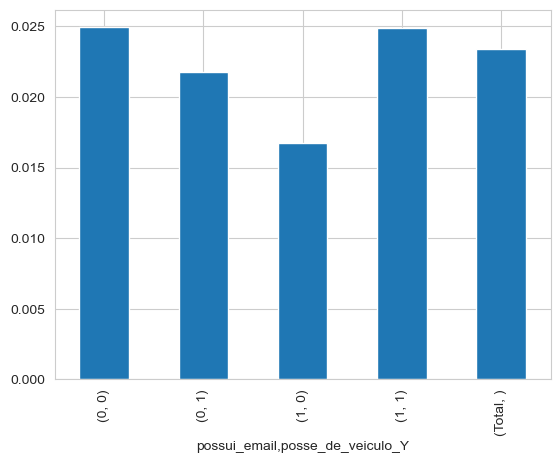

In [40]:
proporcoes.plot.bar()

Com base na tabela e no gráfico acima, podemos observar que uma pessoa que possui apenas e-mail tem proporcionalmente menos chances de ser um mau pagador do que alguém que possui apenas um veículo. No entanto, uma pessoa que não possui nenhum dos dois atributos apresenta praticamente as mesmas chances de ser um mau pagador que alguém que possui ambos.
A ausência de e-mail e a posse de veículo diminuem as chances de ser um mau pagador em relação àqueles que não possuem nenhum dos dois. Por outro lado, ter tanto e-mail quanto veículo aumenta as chances de ser um mau pagador em comparação com aqueles que têm apenas e-mail. É interessante notar que as proporções de mau pagador são muito próximas em todas as quatro comparações, com variação de menos de 1%. Além disso, o grupo de pessoas com e-mail é significativamente menor do que o grupo sem e-mail.
Essa análise comparativa é inconclusiva, tornando difícil determinar qual desses atributos tem mais influência na indicação da probabilidade de um cliente ser um mau pagador.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [38]:
df_dummies.to_csv('Mod07Ex01.csv', index=False)